Shape of dataset: (14, 7)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   district               14 non-null     object 
 1   fatalities             14 non-null     int64  
 2   no_of_camps            14 non-null     int64  
 3   actual_rainfall_in_mm  14 non-null     float64
 4   normal_rainfall_in_mm  14 non-null     float64
 5   no_of_landslides       14 non-null     int64  
 6   full_damaged_houses    14 non-null     int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 916.0+ bytes
None

Summary Statistics:
       fatalities  no_of_camps  actual_rainfall_in_mm  normal_rainfall_in_mm  \
count   14.000000    14.000000              14.000000              14.000000   
mean    24.214286   875.214286             773.307143             417.950000   
std     23.344176  1201.089709             260.248297   

<Figure size 1000x600 with 0 Axes>

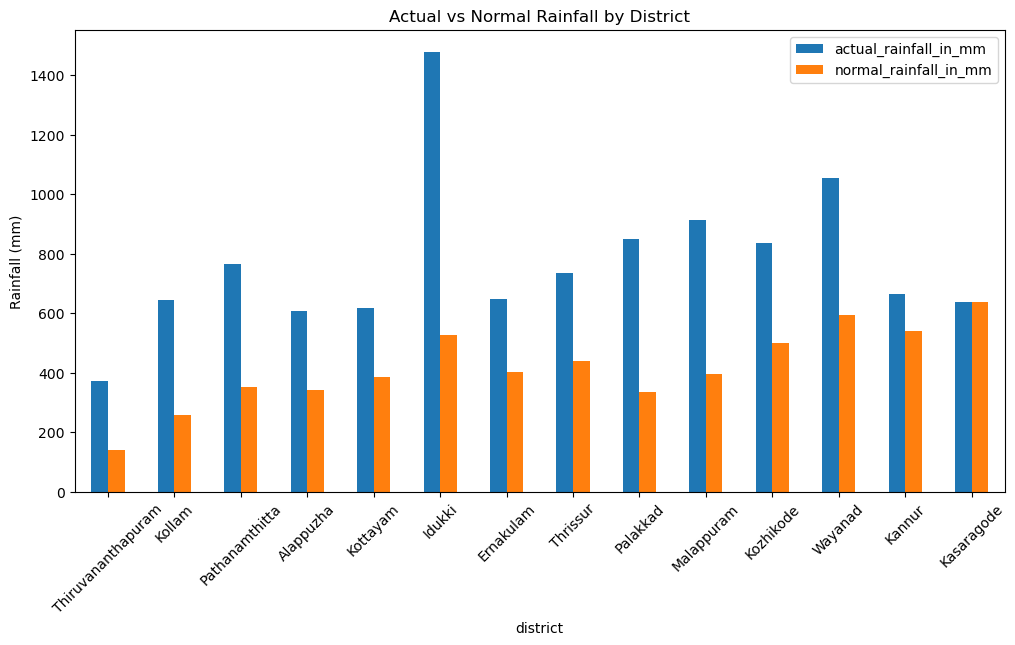

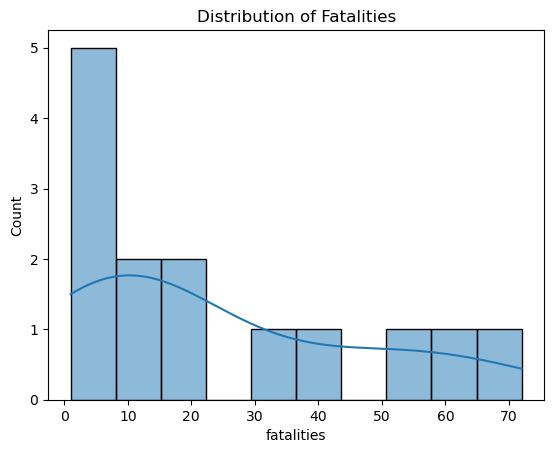

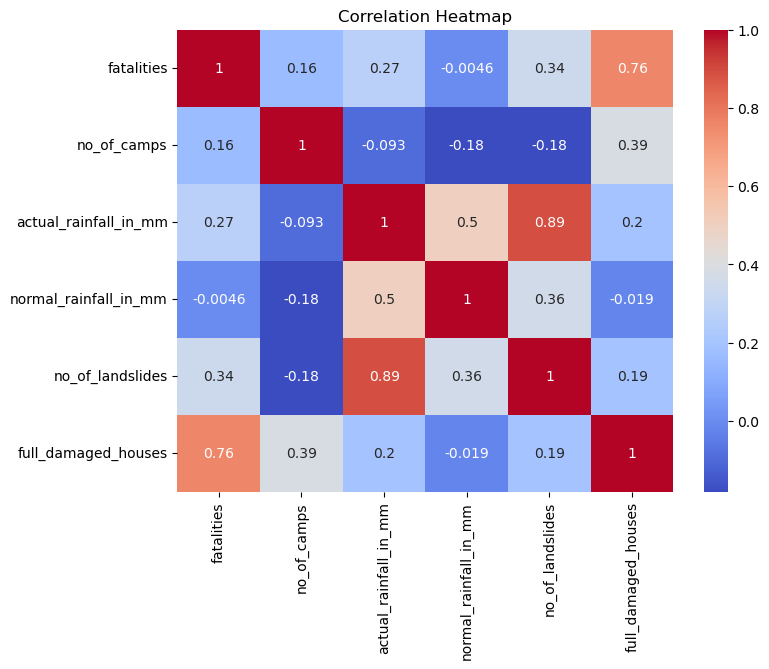


Top Selected Features (SelectKBest): ['no_of_camps', 'actual_rainfall_in_mm', 'no_of_landslides', 'full_damaged_houses', 'district_encoded']

Feature Importance (Random Forest):
 full_damaged_houses      0.396393
district_encoded         0.322213
no_of_camps              0.147113
no_of_landslides         0.067651
actual_rainfall_in_mm    0.037415
normal_rainfall_in_mm    0.029215
dtype: float64


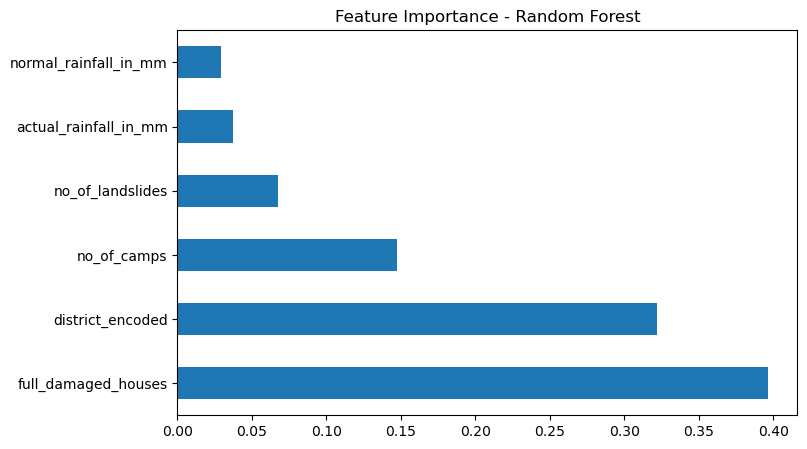


Cleaned dataset saved as 'Week2_District_Disaster_Cleaned.csv'


In [1]:
# -----------------------------
# Week 2 - Disaster Management Project
# Dataset: district_wise_details.csv
# -----------------------------

# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_regression

# 2. Load Dataset
df = pd.read_csv("district_wise_details.csv")

# -----------------------------
# EXPLORATORY DATA ANALYSIS (EDA)
# -----------------------------

print("Shape of dataset:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Top 3 districts with highest fatalities
print("\nTop 3 districts with highest fatalities:")
print(df[['district', 'fatalities']].sort_values(by='fatalities', ascending=False).head(3))

# Plot: Actual vs Normal Rainfall
plt.figure(figsize=(10,6))
df.plot(x='district', y=['actual_rainfall_in_mm', 'normal_rainfall_in_mm'], kind='bar', figsize=(12,6))
plt.title("Actual vs Normal Rainfall by District")
plt.ylabel("Rainfall (mm)")
plt.xticks(rotation=45)
plt.show()

# Distribution of fatalities
sns.histplot(df['fatalities'], bins=10, kde=True)
plt.title("Distribution of Fatalities")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.drop(columns=['district']).corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# -----------------------------
# DATA TRANSFORMATION
# -----------------------------

# Encode categorical column 'district'
le = LabelEncoder()
df['district_encoded'] = le.fit_transform(df['district'])

# Scale numerical features
scaler = StandardScaler()
num_cols = ['fatalities','no_of_camps','actual_rainfall_in_mm',
            'normal_rainfall_in_mm','no_of_landslides','full_damaged_houses']
df[num_cols] = scaler.fit_transform(df[num_cols])

# -----------------------------
# FEATURE SELECTION
# -----------------------------

# Suppose target = fatalities (can be changed)
X = df.drop(columns=['district','fatalities'])
y = df['fatalities']

# Select K Best Features
selector = SelectKBest(score_func=f_regression, k=5)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
print("\nTop Selected Features (SelectKBest):", selected_features.tolist())

# Feature Importance using Random Forest
model = RandomForestRegressor(random_state=42)
model.fit(X, y)
importances = model.feature_importances_

feat_importances = pd.Series(importances, index=X.columns)
print("\nFeature Importance (Random Forest):\n", feat_importances.sort_values(ascending=False))

feat_importances.nlargest(6).plot(kind='barh', figsize=(8,5))
plt.title("Feature Importance - Random Forest")
plt.show()

# -----------------------------
# Save Cleaned Data
# -----------------------------
df.to_csv("Week2_District_Disaster_Cleaned.csv", index=False)
print("\nCleaned dataset saved as 'Week2_District_Disaster_Cleaned.csv'")
